In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

Для работы был использован датасет https://www.kaggle.com/datasets/pranav941/-sea-of-fishes/data

In [2]:
df = pd.read_csv("Sea of fishes.csv")
df.head()

,year,scientific_name,common_name,functional_group,commercial_group,country,sector_type,catch_status,reporting_status,gear_name,catch_sum,Gear_Cat
0,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,bottom trawl,1082.915400,Trawl
1,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,shrimp trawl,112.044685,Trawl
2,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,beam trawl,1937.004300,Trawl
3,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,otter trawl,103.114690,Trawl
4,1950,Marine fishes not identified,Marine fishes nei,Medium demersals (30 - 89 cm),Other fishes & inverts,Belgium,Industrial,Discards,Unreported,pelagic trawl,0.657854,Trawl


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084102 entries, 0 to 1084101
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   year              1084102 non-null  int64  
 1   scientific_name   1084102 non-null  object 
 2   common_name       1084102 non-null  object 
 3   functional_group  1084102 non-null  object 
 4   commercial_group  1084102 non-null  object 
 5   country           1084102 non-null  object 
 6   sector_type       1084102 non-null  object 
 7   catch_status      1084102 non-null  object 
 8   reporting_status  1084102 non-null  object 
 9   gear_name         1084102 non-null  object 
 10  catch_sum         1084102 non-null  float64
 11  Gear_Cat          1084102 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 99.3+ MB


In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print()

year
[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]

scientific_name
['Marine fishes not identified' 'Miscellaneous marine crustaceans'
 'Miscellaneous aquatic invertebrates' 'Marine finfishes not identified'
 'Marine pelagic fishes not identified' 'Mollusca' 'Cnidaria'
 'Elasmobranchii' 'Chondrichthyes' 'Cephalopoda' 'Bivalvia' 'Gastropoda'
 'Echinoidea' 'Asterozoa' 'Echinozoa' 'Squaliformes' 'Rajiformes'
 'Clupeiformes' 'Gadiformes' 'Scorpaeniformes' 'Perciformes'
 'Pleuronectiformes' 'Batoidea' 'Sepiida' 'Octopoda' 'Holothuroidea'
 'Decapoda' 'Dendrobranchiata' 'Mytiloida' 'Squalidae' 'Rajidae'
 'Myliobatidae' 'Clupeidae' 'Congridae' 'Gadidae' 'Macrouridae'
 'Atherinidae' 'Scorpaenida

In [5]:
dff = df[['year', 'country', 'catch_sum']].copy()
years = dff['year'].unique()

In [6]:
countries_list = dff.groupby('country')['catch_sum'].sum().sort_values().index
cl = [countries_list[:len(countries_list)//6]]
cl.append(countries_list[len(countries_list)//6: 2*len(countries_list)//6])
cl.append(countries_list[2*len(countries_list)//6: 3*len(countries_list)//6])
cl.append(countries_list[3*len(countries_list)//6: 4*len(countries_list)//6])
cl.append(countries_list[4*len(countries_list)//6: 5*len(countries_list)//6])
cl.append(countries_list[5*len(countries_list)//6: ])
cl

[Index(['Colombia', 'Barbados', 'Trinidad & Tobago', 'Argentina',
        'Saint Vincent & the Grenadines', 'Syrian Arab Republic', 'Venezuela',
        'South Africa', 'Liberia', 'Philippines'],
       dtype='object', name='country'),
 Index(['Georgia', 'South Cyprus', 'Grenada', 'Algeria', 'Saint Lucia',
        'Montenegro', 'Mexico', 'Curacao', 'Canada', 'Cuba'],
       dtype='object', name='country'),
 Index(['Poland', 'Panama', 'USA', 'Belize', 'Korea (South)', 'Turkey', 'Malta',
        'China', 'Brazil', 'Bulgaria'],
       dtype='object', name='country'),
 Index(['Sierra Leone', 'Croatia', 'Greece', 'Italy', 'Japan', 'Taiwan',
        'Angola', 'Ukraine', 'Unknown Fishing Country', 'Romania'],
       dtype='object', name='country'),
 Index(['Channel Isl. (UK)', 'Azores Isl. (Portugal)', 'Estonia', 'Latvia',
        'Greenland', 'Lithuania', 'Belgium', 'Sweden', 'Ireland',
        'Faeroe Isl. (Denmark)'],
       dtype='object', name='country'),
 Index(['Portugal', 'Germany', '

Text(0.5, 0.98, 'Графики улова по странам')

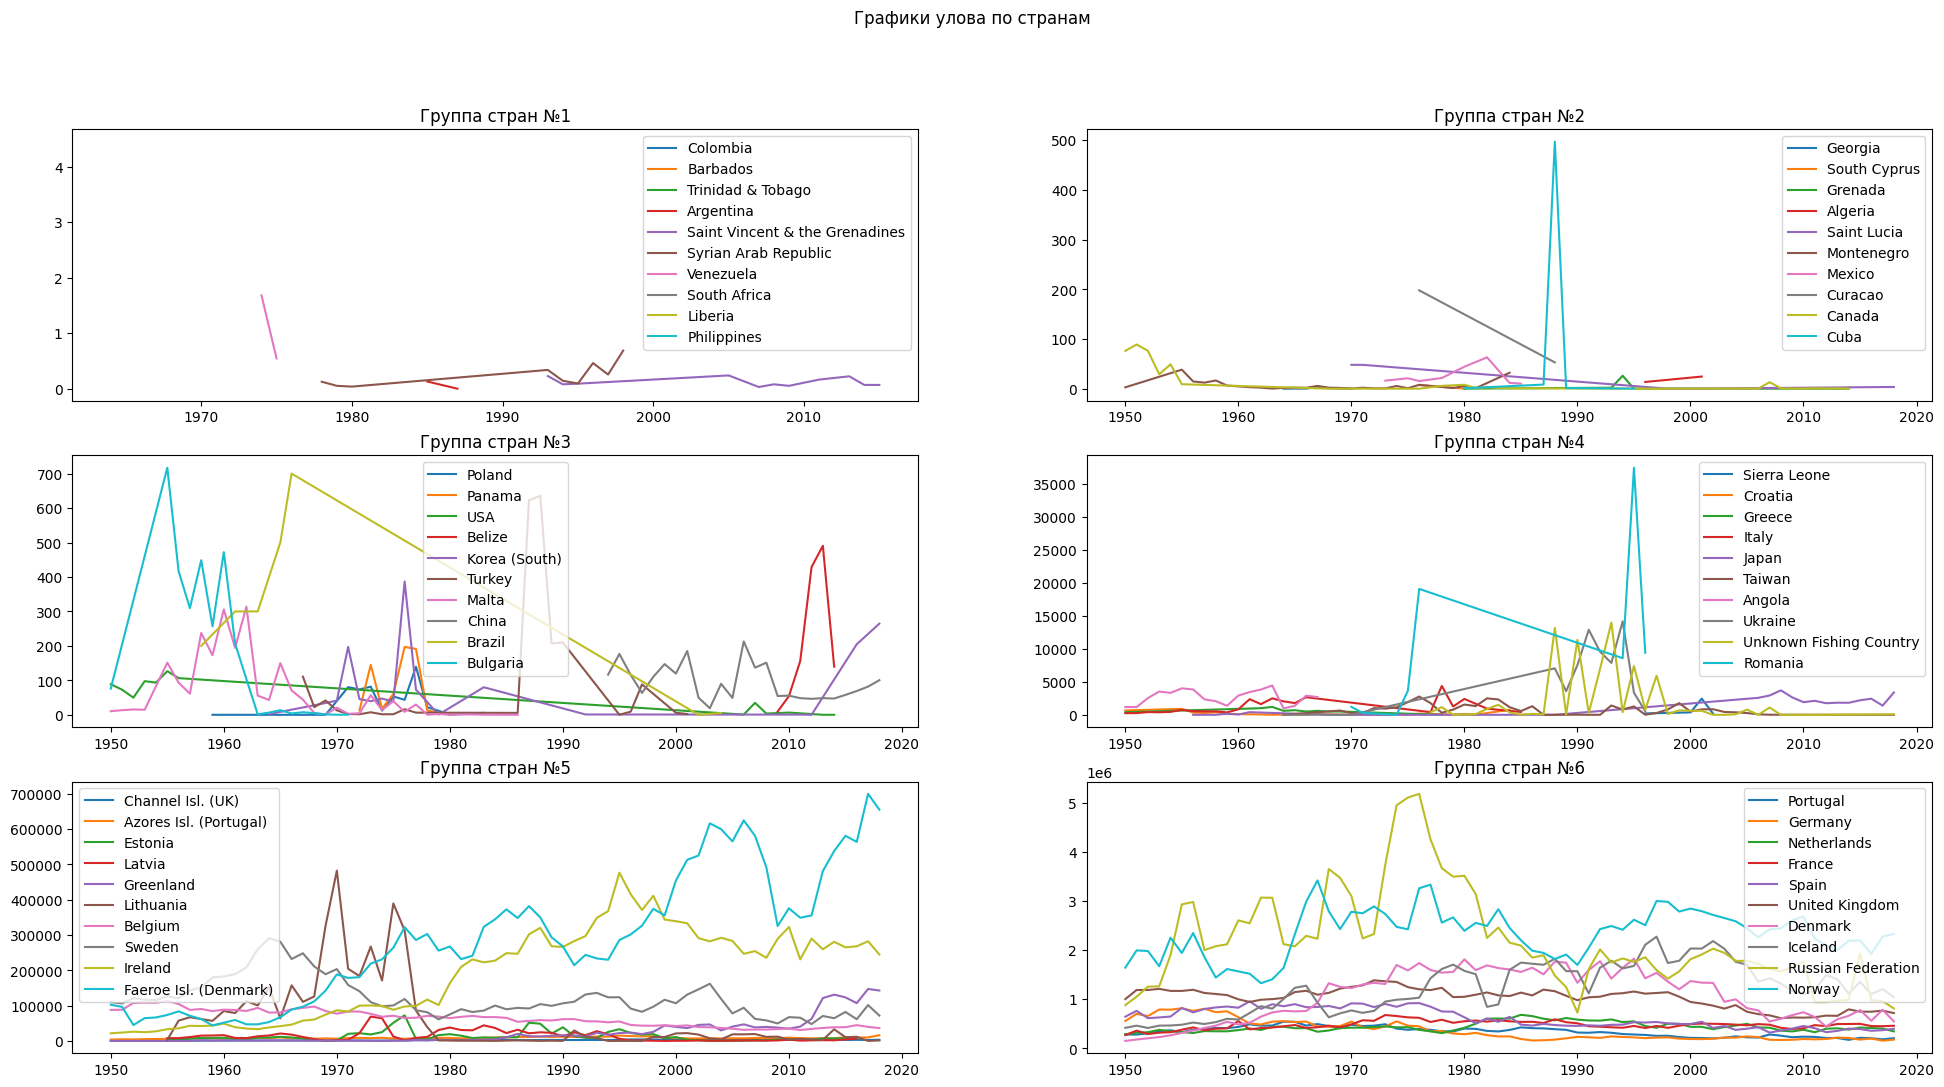

In [7]:
fig, axes = plt.subplots(3, 2)
fig.set_figwidth(24)
fig.set_figheight(12)
for j in enumerate(cl):
    for i in j[1]:
        x = dff[dff['country'] == i].copy()
        axes[j[0]//2, j[0]%2].plot(x['year'].unique(), x.groupby('year')['catch_sum'].sum().values, label=i )
        axes[j[0]//2, j[0]%2].legend()
        axes[j[0]//2, j[0]%2].set_title(f'Группа стран №{j[0]+1}')
plt.suptitle("Графики улова по странам")

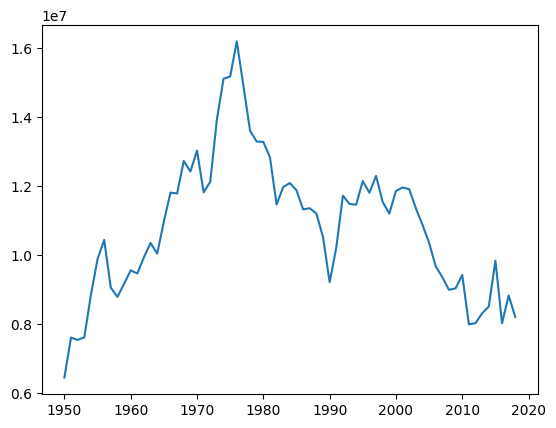

In [8]:
plt.plot(dff['year'].unique(), dff.groupby('year')['catch_sum'].sum().values )

Unreported
Reported


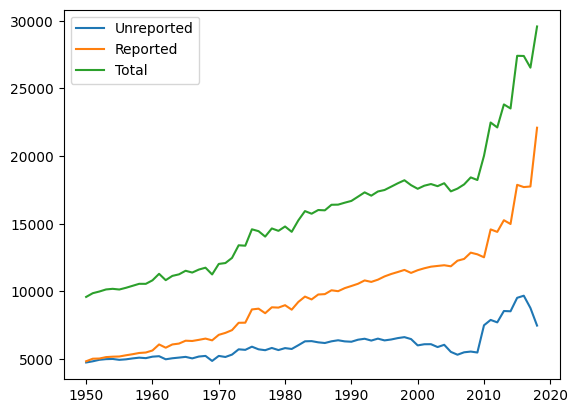

In [9]:
for i in df['reporting_status'].unique()[0:]:
    print(i)
    x = df[df['reporting_status'] == i].copy()
    plt.plot(df['year'].unique(), x.groupby('year')['reporting_status'].count().values, label=i )
plt.plot(df['year'].unique(), df.groupby('year')['reporting_status'].count().values, label='Total' )
plt.legend()

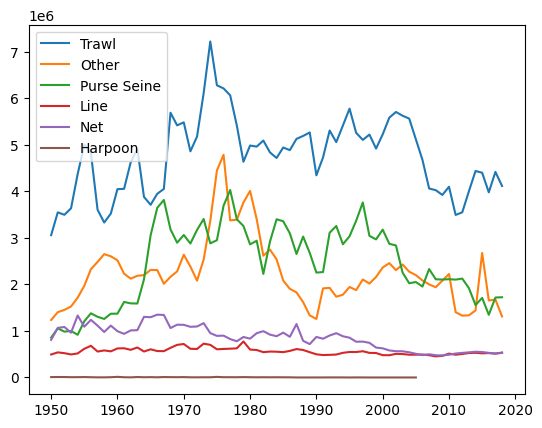

In [10]:
for i in df['Gear_Cat'].unique()[0:]:
    x = df[df['Gear_Cat'] == i].copy()
    plt.plot(x['year'].unique(), x.groupby('year')['catch_sum'].sum().values, label=i )
plt.legend()

In [11]:
df_functional_group = pd.DataFrame(columns=df['functional_group'].unique(),index=df['year'].unique())
for i in df['functional_group'].unique()[0:]:
    x = df[df['functional_group'] == i].copy()
    for j in x['year'].unique():
        df_functional_group[i][j] = x.groupby('year')['catch_sum'].sum()[j]
df_functional_group = df_functional_group.fillna(0)
df_functional_group

,Medium demersals (30 - 89 cm),Shrimps,Other demersal invertebrates,Medium pelagics (30 - 89 cm),Jellyfish,Large sharks (>=90 cm),Cephalopods,Large rays (>=90 cm),Small pelagics (<30 cm),Medium benthopelagics (30 - 89 cm),...,Small demersals (<30 cm),Large benthopelagics (>=90 cm),Large bathydemersals (>=90 cm),Medium bathypelagics (30 - 89 cm),Small benthopelagics (<30 cm),Large flatfishes (>=90 cm),Large bathypelagics (>=90 cm),Small bathydemersals (<30 cm),Krill,Small bathypelagics (<30 cm)
1950,9.586394e+05,121868.786779,124108.413654,1.955310e+06,75.427500,55150.281491,17060.961429,16922.545781,2.360141e+05,2.482123e+05,...,4534.229568,1.385303e+06,3687.307587,718.945258,54.608222,155239.678084,0.000000,0.000000,0.000000,0.000000
1951,1.046252e+06,117224.731097,116508.190109,2.542560e+06,81.074400,70557.256049,18929.781984,16456.028512,2.877785e+05,3.158641e+05,...,4665.205194,1.554190e+06,7663.629897,751.953437,57.064193,150378.276305,0.000000,0.000000,0.000000,0.000000
1952,1.195195e+06,112966.032129,131318.092439,2.270455e+06,86.984100,70545.818586,19227.109216,16279.610819,2.934053e+05,2.557327e+05,...,5104.582250,1.634397e+06,4510.914374,761.559496,58.511012,158668.956822,0.000000,0.000000,0.000000,0.000000
1953,1.134590e+06,150008.417492,140076.101174,2.401352e+06,99.504600,65133.750959,20247.053466,15868.897637,3.277294e+05,2.541814e+05,...,5732.093991,1.581167e+06,5725.349736,764.747864,60.777570,170107.630405,0.000000,0.000000,0.000000,0.000000
1954,1.178680e+06,140918.621020,117426.109999,3.032771e+06,101.051600,64182.449001,21884.307876,15569.197513,3.717641e+05,2.652859e+05,...,6103.742714,1.966738e+06,6322.721539,824.643328,63.557796,149003.064129,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,1.481636e+06,106113.262184,202490.387043,2.309160e+06,32.936874,30081.287985,42366.098557,16453.108473,5.359138e+05,1.247107e+06,...,5843.994307,1.340120e+06,9536.801007,31433.326110,717.396785,143030.734469,1253.998324,39948.363236,0.000000,24.360121
2015,1.711791e+06,83351.044729,211500.571413,2.238256e+06,36.849575,31933.640677,45117.074928,13914.679486,1.054682e+06,1.580688e+06,...,19737.876296,1.622458e+06,7345.588501,60615.799617,511.062830,145843.848151,799.692458,149.370001,0.000000,16.355000
2016,1.167527e+06,88105.694746,224539.969342,2.053912e+06,43.375095,34016.953204,45572.071890,13479.398835,5.424238e+05,1.323068e+06,...,23310.087540,1.259206e+06,8221.856209,53808.886762,487.222062,151076.300067,1251.844564,423.260000,0.000000,0.000000
2017,1.908003e+06,77013.932229,188158.815318,2.072222e+06,44.263676,34204.775946,41667.072717,12531.472815,5.764266e+05,1.485588e+06,...,16989.442640,1.262094e+06,8539.111457,34408.488915,342.515373,136314.831060,737.289988,1459.719960,0.000000,0.000000


<Axes: title={'center': 'Объемы улова рыбы в разрезе лет по функциональным группам'}, xlabel='Годы', ylabel='млн. тонн'>

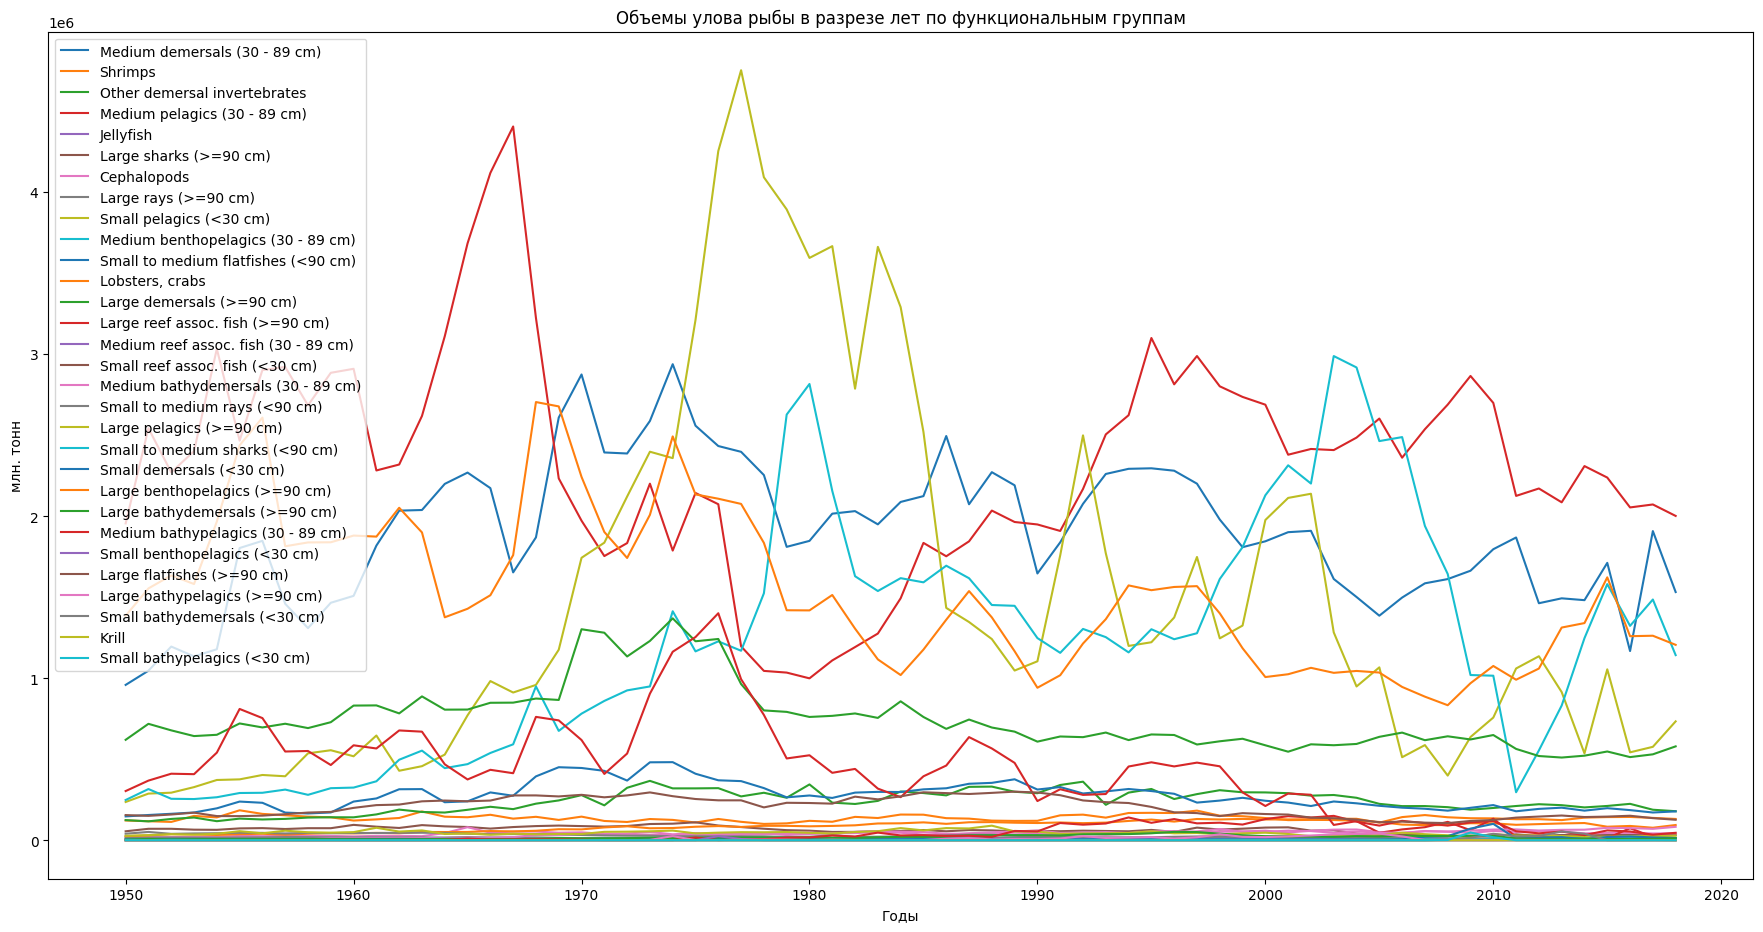

In [12]:
df_functional_group.plot(figsize=(22,11),title="Объемы улова рыбы в разрезе лет по функциональным группам",xlabel="Годы", ylabel="млн. тонн")

In [13]:
df_common_name = pd.DataFrame(columns=df['common_name'].unique(),index=df['year'].unique())
for i in df['common_name'].unique()[0:]:
    x = df[df['common_name'] == i].copy()
    for j in x['year'].unique():
        df_common_name[i][j] = x.groupby('year')['catch_sum'].sum()[j]
df_common_name = df_common_name.fillna(0)
df_common_name.info( verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1950 to 2018
Data columns (total 637 columns):
 #    Column                               Dtype  
---   ------                               -----  
 0    Marine fishes nei                    float64
 1    Marine crabs, shrimps, lobsters nei  float64
 2    Aquatic invertebrates                float64
 3    Finfishes                            float64
 4    Pelagic fishes                       float64
 5    Clams, seasnails, squids, octopuses  float64
 6    Cnidarians, coelenterates            float64
 7    Sharks, rays, skates                 float64
 8    Sharks, rays, chimaeras              float64
 9    Squids, cuttlefishes, octopuses      float64
 10   Clams                                float64
 11   Sea snails                           float64
 12   Sea urchins, sea hedgehogs           float64
 13   Starfishes and brittlestars          float64
 14   Sea urchins and sea cucumbers        float64
 15   Bramble, sleeper, dogfi

In [14]:
df_gear_name = pd.DataFrame(columns=df['gear_name'].unique(),index=df['year'].unique())
for i in df['gear_name'].unique()[0:]:
    x = df[df['gear_name'] == i].copy()
    for j in x['year'].unique():
        df_gear_name[i][j] = x.groupby('year')['catch_sum'].sum()[j]
df_gear_name = df_gear_name.fillna(0)
df_gear_name.info( verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1950 to 2018
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bottom trawl                 69 non-null     float64
 1   shrimp trawl                 69 non-null     float64
 2   beam trawl                   69 non-null     float64
 3   otter trawl                  69 non-null     float64
 4   pelagic trawl                69 non-null     float64
 5   other                        69 non-null     float64
 6   pots or traps                69 non-null     float64
 7   purse seine                  69 non-null     float64
 8   unknown by source            69 non-null     float64
 9   mixed gear                   69 non-null     float64
 10  unknown class                69 non-null     float64
 11  longline                     69 non-null     float64
 12  gillnet                      69 non-null     float64
 13  subsistence fishing ge

In [15]:
df_sector_type = pd.DataFrame(columns=df['sector_type'].unique(),index=df['year'].unique())
for i in df['sector_type'].unique()[0:]:
    x = df[df['sector_type'] == i].copy()
    for j in x['year'].unique():
        df_sector_type[i][j] = x.groupby('year')['catch_sum'].sum()[j]
df_sector_type = df_sector_type.fillna(0)
df_sector_type.info( verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 1950 to 2018
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Industrial    69 non-null     float64
 1   Subsistence   69 non-null     float64
 2   Artisanal     69 non-null     float64
 3   Recreational  69 non-null     float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
def SMAPE(y_true, y_pred):
    numerator = np.abs(y_true-y_pred)
    denumerator = (np.abs(y_true) + np.abs(y_pred))/2
    res = numerator/denumerator
    res = np.sum(res)
    res *= 100
    res /= len(y_true)
    return res

def Metrix(f_true, f_pred):
    print("RMSE:", np.sqrt(mean_squared_error(f_true, f_pred)))
    print("MAPE:", mean_absolute_percentage_error(f_true, f_pred))
    print("MAE:", mean_absolute_error(f_true, f_pred))
    print("R2: ", r2_score(f_true, f_pred))
    print("SMAPE", SMAPE(f_true, f_pred))

In [17]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.arima.model import ARIMA

In [18]:
catch_sum_by_year = df.groupby('year')['catch_sum'].sum()
catch_sum_by_year

year
1950    6.460108e+06
1951    7.619090e+06
1952    7.549156e+06
1953    7.622211e+06
1954    8.857562e+06
            ...     
2014    8.516528e+06
2015    9.849144e+06
2016    8.031516e+06
2017    8.835905e+06
2018    8.212257e+06
Name: catch_sum, Length: 69, dtype: float64

In [19]:
arima_model = ARIMA(catch_sum_by_year, order=(4,2,1)) #4, 2, 1
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              catch_sum   No. Observations:                   69
Model:                 ARIMA(4, 2, 1)   Log Likelihood               -1010.425
Date:                Tue, 26 Mar 2024   AIC                           2032.850
Time:                        17:55:03   BIC                           2046.078
Sample:                             0   HQIC                          2038.085
                                 - 69                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2148      0.147      1.462      0.144      -0.073       0.503
ar.L2         -0.1479      0.119     -1.240      0.215      -0.382       0.086
ar.L3         -0.0438      0.124     -0.353      0.7

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
X = catch_sum_by_year.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train_c, test_c = train.copy(), test.copy() 
history = [x for x in train]
arma_predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(4,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    arma_predictions.append(yhat)
    obs = test[t]
    history.append(obs)

C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\leous\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\leous\AppData\Local\Packages

In [21]:
print('Обучающие данные',len(train))
print('Тренировочные данные',len(test))

Обучающие данные 45
Тренировочные данные 24


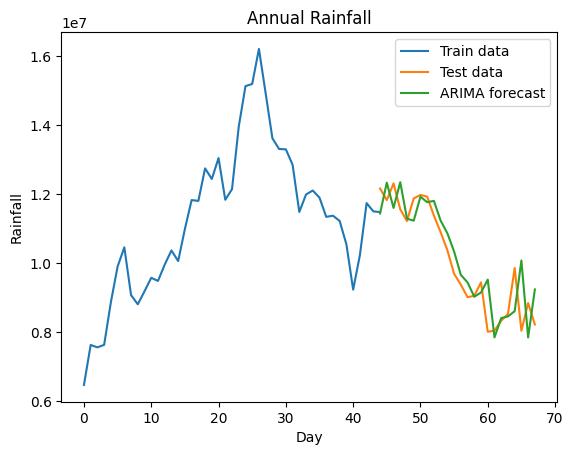

In [22]:
# fig = plt.figure(figsize=(20, 9))
dur = len(arma_predictions)

plt.plot([i for i in range(0, size)], train, label='Train data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], test[:dur], label='Test data')
plt.plot([i for i in range(size - 1, size - 1 + dur)], arma_predictions, label='ARIMA forecast')
plt.legend()#, fontsize="20"
plt.title('Annual Rainfall')
plt.ylabel('Rainfall')#, fontsize="20"
plt.xlabel('Day')#, fontsize="20"
plt.show()

In [23]:
Metrix(test[:dur], arma_predictions)

RMSE: 756677.1940156111
MAPE: 0.06041386412804741
MAE: 572927.9743673744
R2:  0.7497143336633747
SMAPE 5.875438491437237


ARIMA позволяет добиться хорошего результата R2 = 0.75

In [24]:
from tensorflow import keras
from keras.layers import LSTM, Dense, Embedding, Concatenate, Activation ,Reshape

In [25]:
from numpy import log
def plusdim(x):
    m = []
    for i in x:
        m.append([i])
    return np.array(m)

In [26]:
from tensorflow.keras.callbacks import Callback
from IPython.display import clear_output

class PlotLearning(Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.inter_dim = []
        self.val_inter_dim = []
        self.logits = []
        self.val_logits = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()

        self.logs = []

    def on_epoch_end(self, epoch, logs={}):

        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))

        self.i += 1
        f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

        clear_output(wait=True)
        try:
            ax1.set_yscale('log')
            ax1.plot(self.x, self.losses, label="loss:" +
                    str(round(logs.get('loss'), 2)))
            ax1.plot(self.x, self.val_losses, label="v_loss:" +
                    str(round(logs.get('val_loss'), 2)))
            ax1.legend()

            ax2.plot(self.x, self.acc, label="acc:" +
                    str(round(logs.get('accuracy'), 2)))
            ax2.plot(self.x, self.val_acc, label="v_acc:" +
                    str(round(logs.get('val_accuracy'), 2)))
            ax2.legend()
        except:
            pass
        plt.savefig("fig")
        plt.show()


plot = PlotLearning()

In [27]:
def set_set(mas, lookback):
    mm = []
    for i in range(len(mas)-lookback):
        mm.append(mas[i:i+lookback])
    return np.array(mm)

In [28]:
look = 5
data1 = plusdim(X.copy()[:-look])
data2 = df_functional_group.copy().values[:-look]
data3 = df_common_name.copy().values[:-look]
data4 = df_gear_name.copy().values[:-look]
data5 = df_sector_type.copy().values[:-look]
y = plusdim(X.copy()[look:])

In [29]:
data1 = set_set(data1, look)
data2 = set_set(data2, look)
data3 = set_set(data3, look)
data4 = set_set(data4, look)
data5 = set_set(data5, look)
y = set_set(y, look)

In [30]:
from numpy import log
sep = round(data1.shape[0] * 0.8)
X_train = [log(data1[:sep]+1), 
           log(data2[:sep]+1), 
           log(data3[:sep]+1), 
           log(data4[:sep]+1), 
           log(data5[:sep]+1)]
X_test  = [log(data1[sep:]+1), 
           log(data2[sep:]+1), 
           log(data3[sep:]+1), 
           log(data4[sep:]+1), 
           log(data5[sep:]+1)]
Y_train, Y_test = log(y[:sep]+1), log(y[sep:]+1)

In [31]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
print(data5.shape)

(59, 5, 1)
(59, 5, 30)
(59, 5, 637)
(59, 5, 38)
(59, 5, 4)


In [32]:
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras.models import Model

# Определение входов
input1 = Input(shape=(look, 1))
input2 = Input(shape=(look, 30))
input3 = Input(shape=(look, 637))
input4 = Input(shape=(look, 38))
input5 = Input(shape=(look, 4))

relu1 = LeakyReLU()(input1)
relu2 = LeakyReLU()(input2)
relu3 = LeakyReLU()(input3)
relu4 = LeakyReLU()(input4)
relu5 = LeakyReLU()(input5)

# Создание LSTM слоев для каждого входа
lstm1 = LSTM(32)(Reshape((look, 1))    (relu1))
lstm2 = LSTM(32)(Reshape((look, 30))   (relu2))
lstm3 = LSTM(32)(Reshape((look, 637))  (relu3))
lstm4 = LSTM(32)(Reshape((look, 38))   (relu4))
lstm5 = LSTM(32)(Reshape((look, 4))    (relu5))

lstm1 = LeakyReLU()(lstm1)
lstm2 = LeakyReLU()(lstm2)
lstm3 = LeakyReLU()(lstm3)
lstm4 = LeakyReLU()(lstm4)
lstm5 = LeakyReLU()(lstm5)


# Объединение выходов LSTM слоев
merged = concatenate([lstm1, lstm2, lstm3, lstm4, lstm5])
o1 = Dense(32)(merged)
# Добавление дополнительных слоев или вывода по вашему усмотрению
output = Dense(1)(o1)  # Например, выходной слой с одним нейроном для регрессии

# Создание модели
model = Model(inputs=[input1, input2, input3, input4, input5], outputs=output)

# Компиляция модели
model.compile(optimizer='Adagrad', loss='mse', metrics=['accuracy'])

# Вывод структуры модели
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5, 1)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 5, 30)]              0         []                            
                                                                                                  
 input_3 (InputLayer)        [(None, 5, 637)]             0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 5, 38)]              0         []                            
                                                                                            

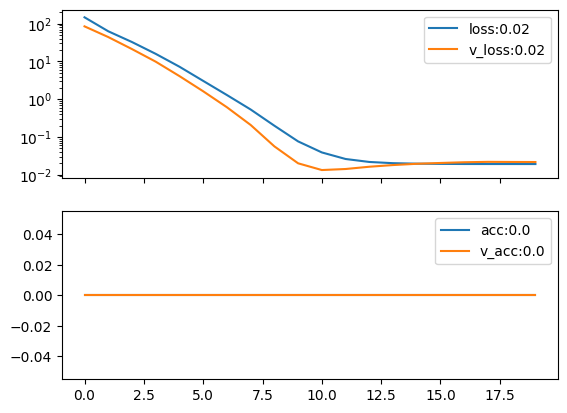

1/1 [==============================] - 2s 2s/step - loss: 0.0217 - accuracy: 0.0000e+00
Test Loss: [0.021680794656276703, 0.0]


In [33]:
# Запуск обучения модели
history = model.fit(
    x= X_train,  # Входные данные для обучения
    y=Y_train,  # Целевая переменная
    batch_size=1,  # Размер пакета
    epochs=20,  # Количество эпох обучения
    validation_data=(X_test, Y_test),  # Валидационные данные
    callbacks =[plot]
)

# После завершения обучения, вы можете оценить модель на тестовых данных
loss = model.evaluate(X_test, Y_test)

# Вывод результатов оценки
print("Test Loss:", loss)

In [34]:
def reset(set):
    mm = []
    for i in set:
        mm.append(i[0])
    return np.array(mm)

1/1 [==============================] - 2s 2s/step


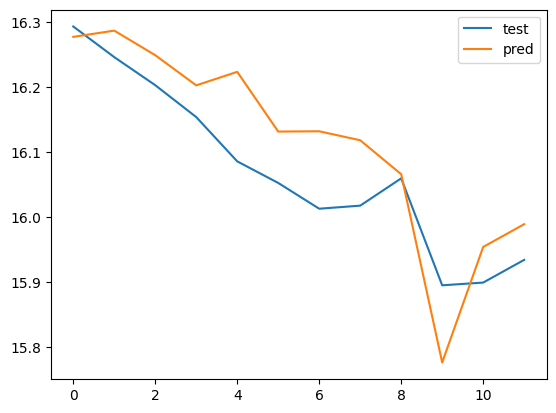

In [35]:
# Предсказание на тестовых данных
predictions = model.predict(X_test)

# Вывод предсказанных значений
plt.plot(reset(Y_test), label="test")
plt.plot(predictions, label="pred")
plt.legend()

In [36]:
Metrix(reset(Y_test), predictions)

RMSE: 0.07969605212621195
MAPE: 0.004279653084257908
MAE: 0.06862641094523407
R2:  0.6003085109487771
SMAPE 0.4272057030773193


Решить поставленную задачу с помощью LSTM не получилось. Основной причиной, вероятнее всего, является малый объем данных, которого не хватает для качественного обучения модели

In [37]:
from tensorflow.keras.models import clone_model

In [158]:
look = 5
data1 = plusdim(X.copy()[:-look])
data2 = df_functional_group.copy().values[:-look]
data3 = df_common_name.copy().values[:-look]
data4 = df_gear_name.copy().values[:-look]
data5 = df_sector_type.copy().values[:-look]
y = plusdim(X.copy()[look:])

data1 = set_set(data1, look)
data2 = set_set(data2, look)
data3 = set_set(data3, look)
data4 = set_set(data4, look)
data5 = set_set(data5, look)
y = set_set(y, look)

from numpy import log
sep = round(data1.shape[0] * 0.9)
X_train = [data1[:sep]**(0.5), 
           data2[:sep]**(0.5), 
           data3[:sep]**(0.5), 
           data4[:sep]**(0.5), 
           data5[:sep]**(0.5)]
X_test  = [data1[sep:]**(0.5), 
           data2[sep:]**(0.5), 
           data3[sep:]**(0.5), 
           data4[sep:]**(0.5), 
           data5[sep:]**(0.5)]
Y_train, Y_test = y[:sep]**(0.5), y[sep:]**(0.5)

In [159]:
from tensorflow.keras.layers import Input, LSTM, concatenate, Dense, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras.models import Model

# Определение входов
input1 = Input(shape=(look, 1))
input2 = Input(shape=(look, 30))
input3 = Input(shape=(look, 637))
input4 = Input(shape=(look, 38))
input5 = Input(shape=(look, 4))

relu1 = LeakyReLU()(input1)
relu2 = LeakyReLU()(input2)
relu3 = LeakyReLU()(input3)
relu4 = LeakyReLU()(input4)
relu5 = LeakyReLU()(input5)

# Создание LSTM слоев для каждого входа
lstm1 = LSTM(32)(Reshape((look, 1))    (relu1))
lstm2 = LSTM(32)(Reshape((look, 30))   (relu2))
lstm3 = LSTM(32)(Reshape((look, 637))  (relu3))
lstm4 = LSTM(32)(Reshape((look, 38))   (relu4))
lstm5 = LSTM(32)(Reshape((look, 4))    (relu5))

lstm1 = LeakyReLU()(lstm1)
lstm2 = LeakyReLU()(lstm2)
lstm3 = LeakyReLU()(lstm3)
lstm4 = LeakyReLU()(lstm4)
lstm5 = LeakyReLU()(lstm5)


# Объединение выходов LSTM слоев
merged = concatenate([lstm1, lstm2, lstm3, lstm4, lstm5])
o1 = Dense(32)(merged)
# Добавление дополнительных слоев или вывода по вашему усмотрению
output = Dense(1)(o1)  # Например, выходной слой с одним нейроном для регрессии

# Создание модели
model = Model(inputs=[input1, input2, input3, input4, input5], outputs=output)

# Компиляция модели
model.compile(optimizer='Adagrad', loss='msle')

# Вывод структуры модели
model.summary()

Model: "model_22"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_111 (InputLayer)      [(None, 5, 1)]               0         []                            
                                                                                                  
 input_112 (InputLayer)      [(None, 5, 30)]              0         []                            
                                                                                                  
 input_113 (InputLayer)      [(None, 5, 637)]             0         []                            
                                                                                                  
 input_114 (InputLayer)      [(None, 5, 38)]              0         []                            
                                                                                           

In [160]:
l1 = 10000000
l2 = 100000000
M1 = clone_model(model)
M1.compile(optimizer='Adagrad', loss='msle')
while l2> l1:
    l2 = l1
    M1.set_weights(model.get_weights())
    history = model.fit(
    x= X_train,  # Входные данные для обучения
    y=Y_train,  # Целевая переменная
    batch_size=1,  # Размер пакета
    epochs=1,  # Количество эпох обучения
    validation_data=(X_test, Y_test)  # Валидационные данные
    )
    l1 = history.history['val_loss'][-1]

# После завершения обучения, вы можете оценить модель на тестовых данных
loss = M1.evaluate(X_test, Y_test)

# Вывод результатов оценки
print("Test Loss:", loss)

1/1 [==============================] - 2s 2s/step - loss: 3.0992
Test Loss: 3.0992143154144287


1/1 [==============================] - 2s 2s/step
RMSE: 2437.033540894347
MAPE: 0.8286912927375859
MAE: 2435.182334462105
R2:  -683.7990825997185
SMAPE 141.50744967705856


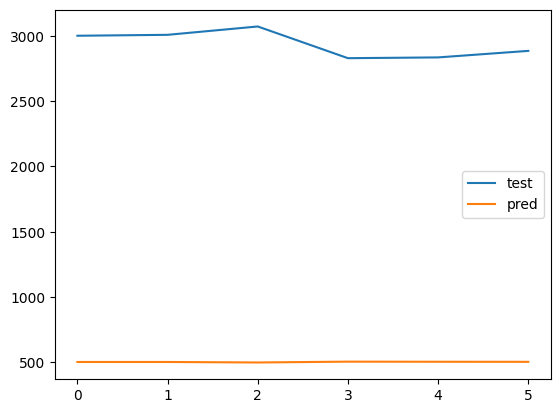

In [161]:
predictions = M1.predict(X_test)
plt.plot(reset(Y_test), label="test")
plt.plot(predictions, label="pred")
plt.legend()
Metrix(reset(Y_test), predictions)